# null importance: feature selection

In [1]:
import pandas as pd
import numpy as np
import glob
import pickle as pkl
from models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
def get_feature_importance(model):
    # return np.log1p(model.estimator.feature_importance(importance_type='gain', iteration=model.estimator.best_iteration))
    return model.estimator.feature_importance(importance_type='gain', iteration=model.estimator.best_iteration)

In [3]:
model_name = "outlier037_gbdt"

feature_importance_df = pd.DataFrame()
for i in range(6):
    part = pd.read_csv("./models/lgb037.csv")
    model = load_model("./models/{}_{}.pkl".format(model_name, i))

    part["fi"] = get_feature_importance(model)
    feature_importance_df = pd.concat([feature_importance_df, part], axis=0)

[info] load model : ./models/outlier037_gbdt_0.pkl
[info] load model : ./models/outlier037_gbdt_1.pkl
[info] load model : ./models/outlier037_gbdt_2.pkl
[info] load model : ./models/outlier037_gbdt_3.pkl
[info] load model : ./models/outlier037_gbdt_4.pkl
[info] load model : ./models/outlier037_gbdt_5.pkl


In [4]:
def load_lgb_if(model_name, nsplit, features_fn):
    feature_importance_df = pd.DataFrame()
    for i in range(nsplit):
        part = pd.read_csv(features_fn)
        model = load_model("./models/{}_{}.pkl".format(model_name, i))

        part["fi"] = get_feature_importance(model)
        feature_importance_df = pd.concat([feature_importance_df, part], axis=0)
    return feature_importance_df

In [5]:
nsplit = 6
features_fn = "./models/lgb037.csv"

fi024 = load_lgb_if("outlier037_gbdt", nsplit, features_fn)
fi024_null = load_lgb_if("outlier037_gbdt_null", nsplit, features_fn)

[info] load model : ./models/outlier037_gbdt_0.pkl
[info] load model : ./models/outlier037_gbdt_1.pkl
[info] load model : ./models/outlier037_gbdt_2.pkl
[info] load model : ./models/outlier037_gbdt_3.pkl
[info] load model : ./models/outlier037_gbdt_4.pkl
[info] load model : ./models/outlier037_gbdt_5.pkl
[info] load model : ./models/outlier037_gbdt_null_0.pkl
[info] load model : ./models/outlier037_gbdt_null_1.pkl
[info] load model : ./models/outlier037_gbdt_null_2.pkl
[info] load model : ./models/outlier037_gbdt_null_3.pkl
[info] load model : ./models/outlier037_gbdt_null_4.pkl
[info] load model : ./models/outlier037_gbdt_null_5.pkl


In [6]:
avg_fi_cmp = pd.DataFrame()
avg_fi_cmp["fi"] = fi024.groupby("feature_name").fi.mean()
avg_fi_cmp["fi_null"] = fi024_null.groupby("feature_name").fi.mean()
avg_fi_cmp["fi_complex"] = (avg_fi_cmp.fi + 1) / (avg_fi_cmp.fi_null + 1)

for col in avg_fi_cmp.columns:
    avg_fi_cmp[col] = np.log1p(avg_fi_cmp[col])

In [7]:
avg_fi_cmp.sort_values("fi_complex").tail(150).head(20)

,fi,fi_null,fi_complex
feature_name,,,
nmf100_18_nmf100,0.000000,0.0,0.693147
newk_purchase_amount_total_newk,0.000000,0.0,0.693147
nmf100_19_nmf100,0.000000,0.0,0.693147
nmf100_20_nmf100,0.000000,0.0,0.693147
nmf100_21_nmf100,0.000000,0.0,0.693147
nmf100_17_nmf100,0.000000,0.0,0.693147
nmf100_12_nmf100,0.000000,0.0,0.693147
newk_new_CLV_newk,0.078655,0.0,0.733248
ratio_2_lag-4_monthly_psum,0.320125,0.0,0.865965


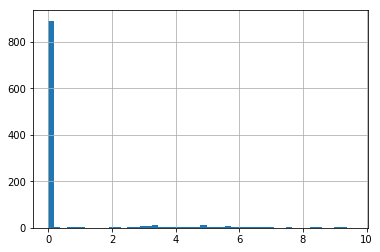

In [8]:
avg_fi_cmp.fi.hist(bins=50)

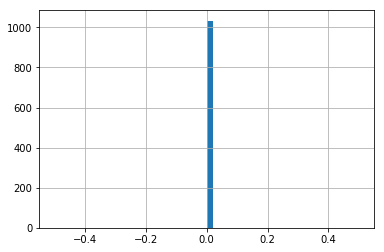

In [9]:
avg_fi_cmp.fi_null.hist(bins=50)

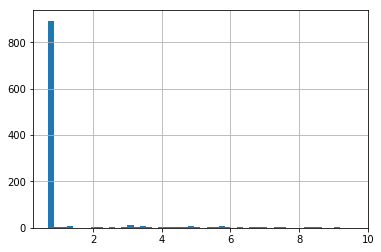

In [10]:
avg_fi_cmp.fi_complex.hist(bins=50)

In [11]:
avg_fi_cmp.to_csv("./models/lgb037_fi.csv")

In [23]:
avg_fi_cmp[avg_fi_cmp.fi_complex > 6].shape

(35, 3)

In [22]:
avg_fi_cmp[avg_fi_cmp.fi_complex > 2].shape

(126, 3)

In [14]:
avg_fi_cmp_st = avg_fi_cmp.sort_values("fi_complex").reset_index()

In [15]:
avg_fi_cmp_st.shape[0]

1033

In [16]:
avg_fi_cmp_st.sort_values("fi").head(800).tail(50)

,feature_name,fi,fi_null,fi_complex
335,sum_3_lag2_monthly_merchant_avg_std_abs,0.0,0.0,0.693147
417,sum_1_lag-12_monthly_merchant_avg_std,0.0,0.0,0.693147
415,sum_1_lag-10_monthly_psum,0.0,0.0,0.693147
391,sum_1_lag-7_monthly_pmax,0.0,0.0,0.693147
392,sum_1_lag-2_monthly_pmax,0.0,0.0,0.693147
393,sum_1_lag-2_monthly_merchant_pmax,0.0,0.0,0.693147
394,sum_1_lag-2_monthly_merchant_avg_std,0.0,0.0,0.693147
395,subsector_id_27_new_trans,0.0,0.0,0.693147
396,subsector_id_29_hist_trans,0.0,0.0,0.693147
397,subsector_id_31_hist_trans,0.0,0.0,0.693147


In [17]:
avg_fi_cmp_st[avg_fi_cmp_st.feature_name.apply(lambda x: x.startswith("kernelpca"))]

,feature_name,fi,fi_null,fi_complex
591,kernelpca_22_kernelpca,0.0,0.0,0.693147
592,kernelpca_23_kernelpca,0.0,0.0,0.693147
593,kernelpca_24_kernelpca,0.0,0.0,0.693147
594,kernelpca_25_kernelpca,0.0,0.0,0.693147
595,kernelpca_26_kernelpca,0.0,0.0,0.693147
596,kernelpca_27_kernelpca,0.0,0.0,0.693147
597,kernelpca_28_kernelpca,0.0,0.0,0.693147
598,kernelpca_29_kernelpca,0.0,0.0,0.693147
599,kernelpca_2_kernelpca,0.0,0.0,0.693147
600,kernelpca_30_kernelpca,0.0,0.0,0.693147


In [18]:
avg_fi_cmp_st[avg_fi_cmp_st.feature_name.apply(lambda x: x.startswith("fastica"))]

,feature_name,fi,fi_null,fi_complex
496,fastica50_45_fastica50,0.0,0.0,0.693147
498,fastica50_44_fastica50,0.0,0.0,0.693147
500,fastica50_42_fastica50,0.0,0.0,0.693147
504,fastica50_41_fastica50,0.0,0.0,0.693147
508,fastica50_40_fastica50,0.0,0.0,0.693147
509,fastica50_43_fastica50,0.0,0.0,0.693147
511,fastica50_46_fastica50,0.0,0.0,0.693147
520,fastica50_8_fastica50,0.0,0.0,0.693147
521,fastica50_7_fastica50,0.0,0.0,0.693147
522,fastica50_6_fastica50,0.0,0.0,0.693147


In [19]:
avg_fi_cmp.sort_values("fi_complex").head(100)

,fi,fi_null,fi_complex
feature_name,,,
ratio_1_lag-1_monthly_pmax,0.0,0.0,0.693147
ratio_3_lag3_monthly_merchant_pmax_abs,0.0,0.0,0.693147
ratio_3_lag3_monthly_pmax_abs,0.0,0.0,0.693147
ratio_3_lag4_monthly_merchant_avg_std_abs,0.0,0.0,0.693147
ratio_3_lag4_monthly_merchant_pmax_abs,0.0,0.0,0.693147
ratio_3_lag5_monthly_merchant_pmax_abs,0.0,0.0,0.693147
ratio_3_lag5_monthly_pmax_abs,0.0,0.0,0.693147
ratio_3_lag6_monthly_merchant_avg_std_abs,0.0,0.0,0.693147
ratio_3_lag6_monthly_merchant_pmax_abs,0.0,0.0,0.693147


In [20]:
avg_fi_cmp.sort_values("fi_complex").tail(100)

,fi,fi_null,fi_complex
feature_name,,,
newk_new_purchase_amount_sum_newk,3.260939,0.0,3.298575
ratio_4_lag2_monthly_pmax,3.301912,0.0,3.338063
newk_hist_Valentine_Day_2017_mean_newk,3.317672,0.0,3.353268
sum_1_lag6_monthly_pmax_abs,3.325238,0.0,3.360570
sum_2_lag12_monthly_merchant_pmax_abs,3.328079,0.0,3.363313
ratio_2_lag2_monthly_merchant_pmax,3.330409,0.0,3.365562
newk_month_lag_min_newk,3.380992,0.0,3.414440
newk_new_day_max_newk,3.394097,0.0,3.427117
newk_new_price_min_newk,3.413383,0.0,3.445782
